## To start this exercise, pick a dataset. It could be one you've worked with before or it could be a new dataset. Then build the best decision tree that you can.

## Hopefully, out of this you'll see the power of random forests, but you'll also see their potential costs. Remember, in the real world, you won't necessarily be dealing with thousands of rows. There may be millions, billions, or even more.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

## Now, try to match that with the simplest random forest that you can. For this exercise, measure simplicity with runtime. Compare that to the runtime of the decision tree. This is imperfect, but just go with it.

In [2]:
price_df = pd.read_csv('data/houseprices.csv')

In [3]:
price_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
price_df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
price_df.isna().sum().head(60)

id                 0
mssubclass         0
mszoning           0
lotfrontage      259
lotarea            0
street             0
alley           1369
lotshape           0
landcontour        0
utilities          0
lotconfig          0
landslope          0
neighborhood       0
condition1         0
condition2         0
bldgtype           0
housestyle         0
overallqual        0
overallcond        0
yearbuilt          0
yearremodadd       0
roofstyle          0
roofmatl           0
exterior1st        0
exterior2nd        0
masvnrtype         8
masvnrarea         8
exterqual          0
extercond          0
foundation         0
bsmtqual          37
bsmtcond          37
bsmtexposure      38
bsmtfintype1      37
bsmtfinsf1         0
bsmtfintype2      38
bsmtfinsf2         0
bsmtunfsf          0
totalbsmtsf        0
heating            0
heatingqc          0
centralair         0
electrical         1
firstflrsf         0
secondflrsf        0
lowqualfinsf       0
grlivarea          0
bsmtfullbath 

In [6]:
price_df.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paved

In [7]:
price_df = price_df.drop(columns=['id', 'alley', 'lotfrontage', 'fireplacequ', 'poolqc', 'fence', 'miscfeature', 'miscval',
                                 'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf','enclosedporch', 'threessnporch', 
                                  'screenporch', 'poolarea', 'poolqc','fence', 'miscfeature', 'miscval', 'mosold', 
                                  'yrsold', 'saletype', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 
                                 'openporchsf'])

In [8]:
price_df = price_df.dropna()

In [9]:
price_df

,mssubclass,mszoning,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,...,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,salecondition,saleprice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,2003.0,RFn,2,548,TA,TA,Y,0,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,1976.0,RFn,2,460,TA,TA,Y,298,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,2001.0,RFn,2,608,TA,TA,Y,0,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,1998.0,Unf,3,642,TA,TA,Y,0,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,2000.0,RFn,3,836,TA,TA,Y,192,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,1999.0,RFn,2,460,TA,TA,Y,0,Normal,175000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,1978.0,Unf,2,500,TA,TA,Y,349,Normal,210000
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,1941.0,RFn,1,252,TA,TA,Y,0,Normal,266500
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,1950.0,Unf,1,240,TA,TA,Y,366,Normal,142125


## The Blind Approach

In [10]:
rfc = ensemble.RandomForestClassifier()

In [11]:
X = price_df.drop('saleprice', 1)
Y = price_df['saleprice']
X = pd.get_dummies(X)

In [12]:
cross_val_score(rfc, X, Y, cv=5)

array([0.0261194 , 0.01492537, 0.0261194 , 0.00746269, 0.01498127])

In [15]:
corrmap = price_df.corr()
corrmap

,mssubclass,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,totalbsmtsf,firstflrsf,...,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,saleprice
mssubclass,1.000000,-0.134116,0.050761,-0.097752,0.055755,0.037899,0.030658,-0.069921,-0.264283,-0.259346,...,0.197939,-0.065794,0.239217,0.014324,-0.025098,0.081342,0.005698,-0.071475,-0.009660,-0.080337
lotarea,-0.134116,1.000000,0.090385,0.001417,-0.005024,0.001678,0.096687,0.209980,0.264506,0.288350,...,0.006054,0.120367,-0.012611,0.185647,0.263030,-0.025695,0.138058,0.168364,0.167787,0.254608
overallqual,0.050761,0.090385,1.000000,-0.163506,0.571082,0.549829,0.401758,0.198599,0.505689,0.482581,...,0.248254,0.082113,-0.135163,0.442913,0.377609,0.546257,0.592564,0.530955,0.217590,0.783810
overallcond,-0.097752,0.001417,-0.163506,1.000000,-0.417541,0.034689,-0.141424,-0.060608,-0.227851,-0.144459,...,-0.073212,0.023105,-0.070831,-0.063991,-0.032128,-0.336788,-0.250243,-0.205404,-0.012620,-0.109062
yearbuilt,0.055755,-0.005024,0.571082,-0.417541,1.000000,0.617415,0.299941,0.225093,0.385063,0.264236,...,0.226880,-0.080481,-0.176184,0.099588,0.111165,0.825303,0.524602,0.444537,0.211576,0.504751
yearremodadd,0.037899,0.001678,0.549829,0.034689,0.617415,1.000000,0.168871,0.100543,0.265044,0.242481,...,0.168825,-0.074252,-0.154214,0.174794,0.090282,0.641822,0.459966,0.386869,0.200425,0.501829
masvnrarea,0.030658,0.096687,0.401758,-0.141424,0.299941,0.168871,1.000000,0.253799,0.365700,0.341574,...,0.192553,0.108917,-0.007424,0.289853,0.229661,0.250302,0.364679,0.368050,0.148510,0.466294
bsmtfinsf1,-0.069921,0.209980,0.198599,-0.060608,0.225093,0.100543,0.253799,1.000000,0.505113,0.451045,...,-0.026084,-0.118820,-0.035779,0.046551,0.245691,0.145504,0.199082,0.285615,0.186155,0.360518
totalbsmtsf,-0.264283,0.264506,0.505689,-0.227851,0.385063,0.265044,0.365700,0.505113,1.000000,0.888263,...,-0.126590,0.030361,0.035818,0.295728,0.326893,0.321971,0.455220,0.513394,0.209180,0.600446
firstflrsf,-0.259346,0.288350,0.482581,-0.144459,0.264236,0.242481,0.341574,0.451045,0.888263,1.000000,...,-0.147083,0.100743,0.059062,0.393821,0.402155,0.238581,0.441047,0.500820,0.232346,0.605139


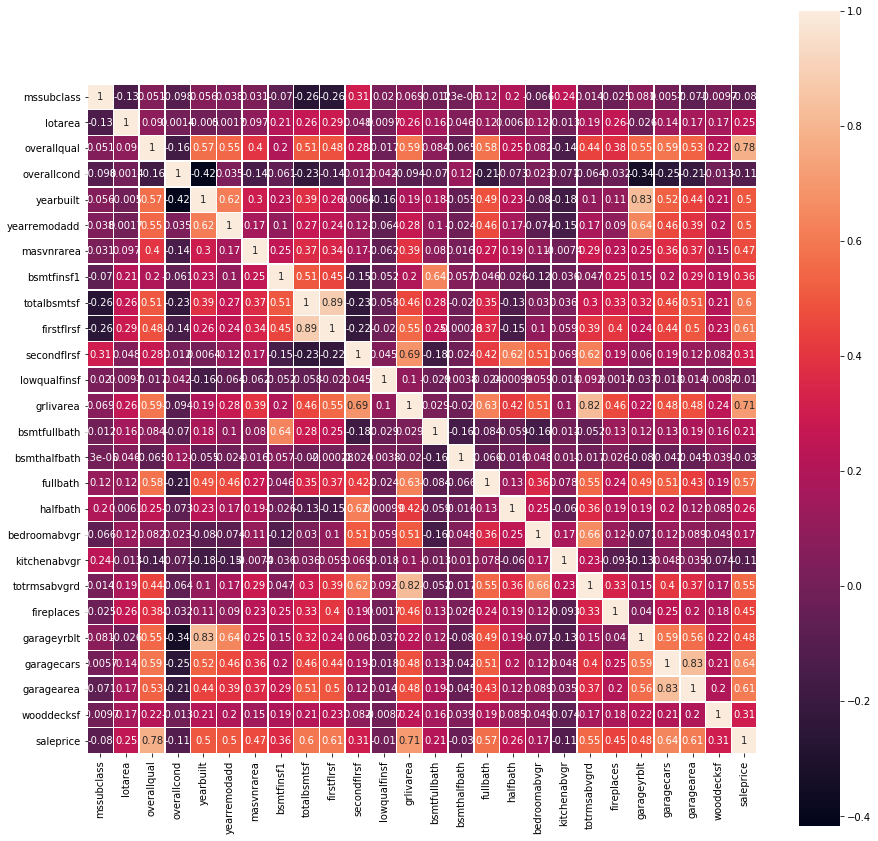

In [16]:
plt.figure(figsize=(15, 15))
sns.heatmap(corrmap, square=True, annot=True, linewidths=.5)
plt.show()

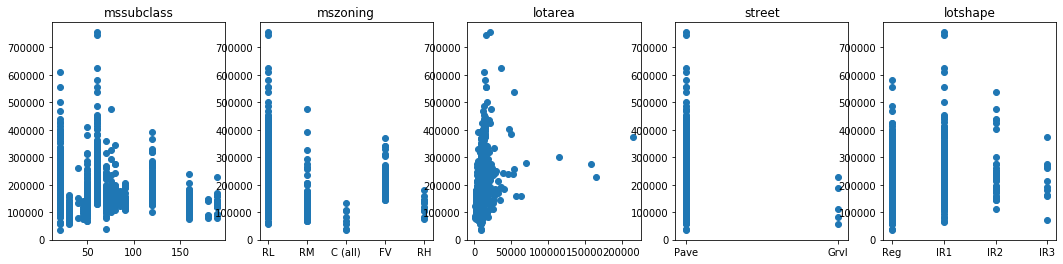

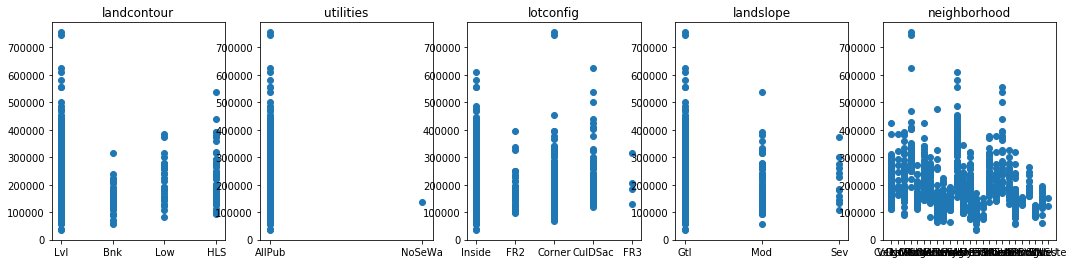

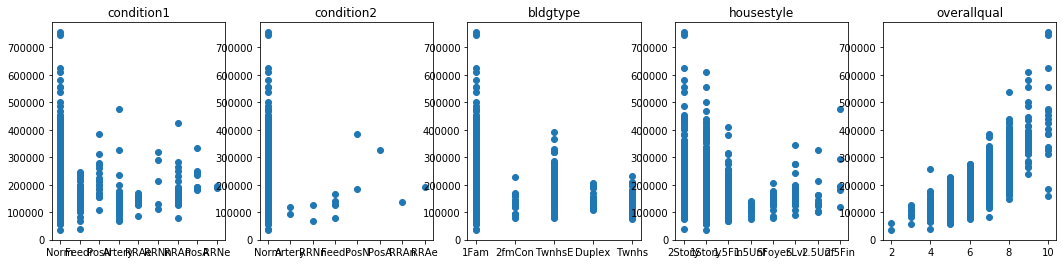

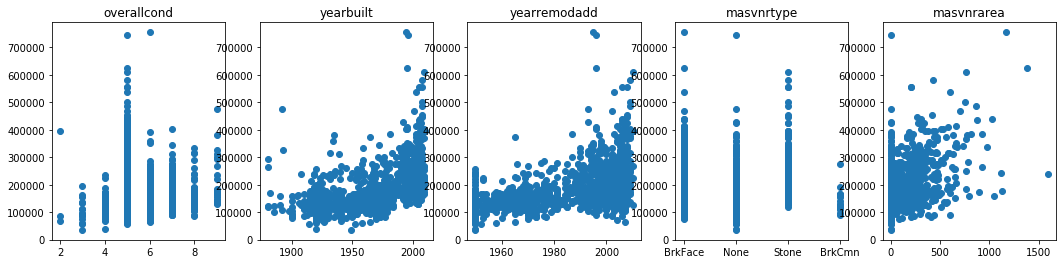

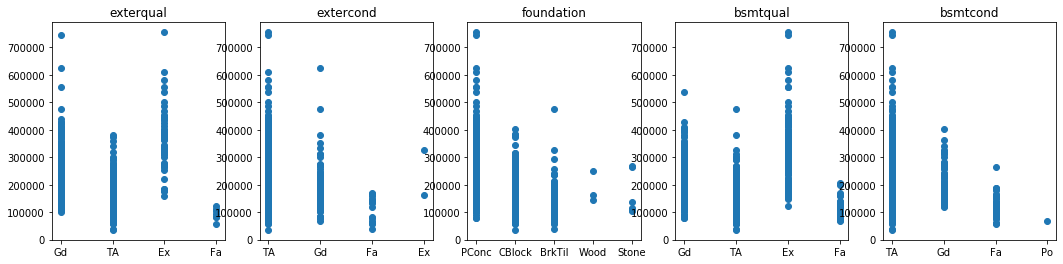

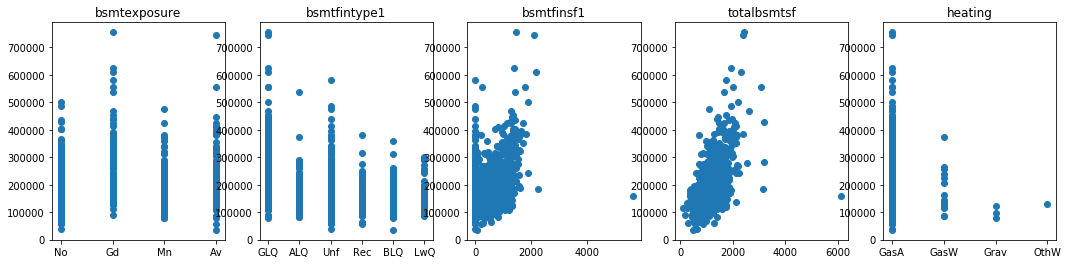

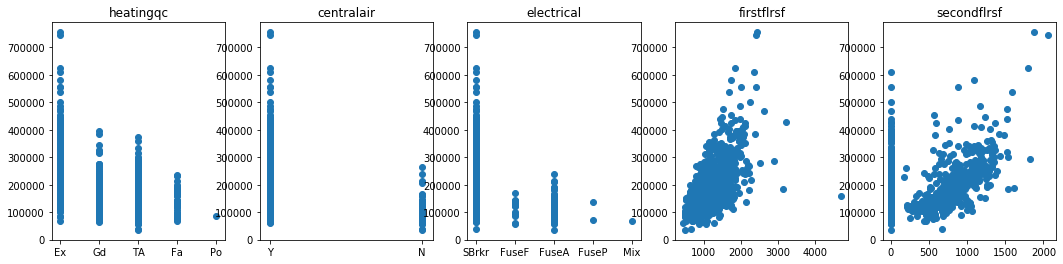

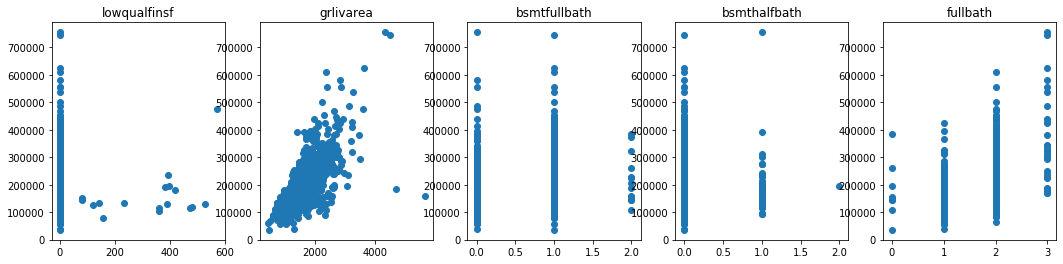

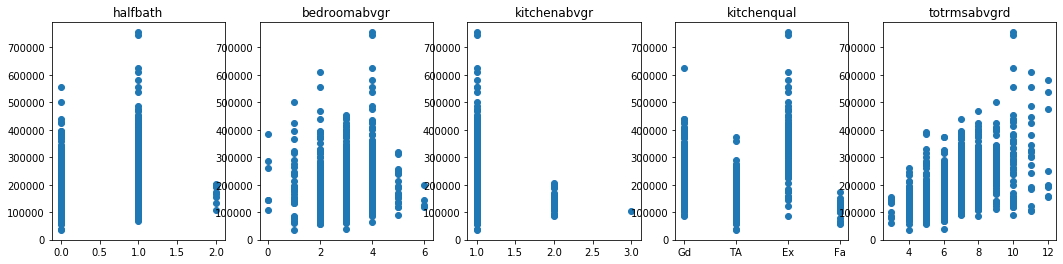

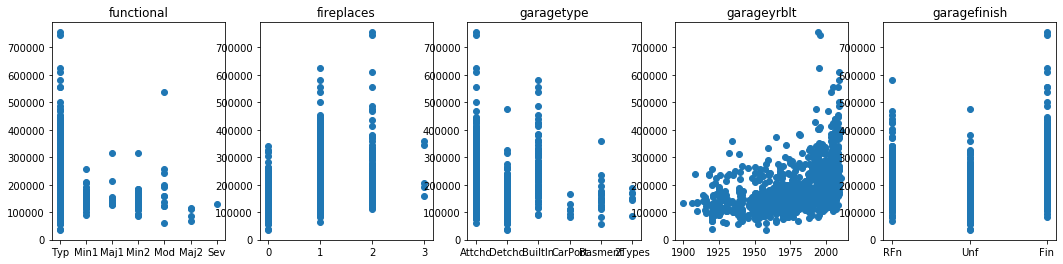

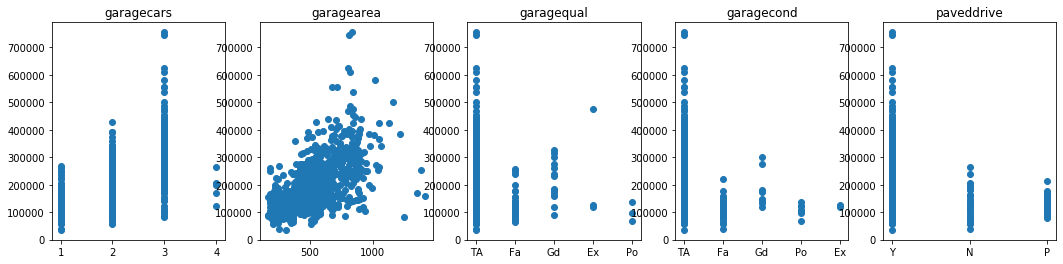

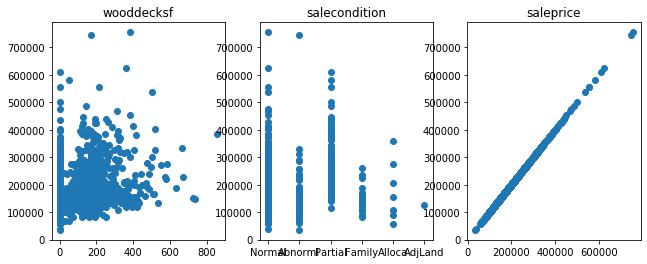

In [17]:
cols = price_df.columns

x = 1
plt.figure(figsize=(18,4))
for col in cols:
    plt.subplot(1,5,x)
    plt.scatter(price_df[col], price_df["saleprice"])
    plt.title(col)
    
    if (x == 5):
        x = 1
        plt.show()
        plt.figure(figsize=(18,4))
    else:
        x += 1

In [18]:
rfc = ensemble.RandomForestClassifier()

In [19]:
X = price_df[['totalbsmtsf', 'grlivarea', 'overallqual']]
Y = price_df['saleprice']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

In [20]:
cross_val_score(rfc, X, Y, cv=5)

array([0.00746269, 0.00373134, 0.00746269, 0.00746269, 0.00374532])